# Project 3

This project is about simulating the E91 quantum key distribution protocol using a quantum computer simulator. E91 lets two people (Alice and Bob) generate a shared secret key by using quantum entanglement.

Mateusz Tabaszewski 151945

## Imports

In [31]:
import math
from numpy import pi
import numpy as np
import pandas as pd
from qiskit import *
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
import random

random.seed(42)

## Functions

In [32]:
def build_charlie_circuit():
    n0=2
    q_charlie = QuantumRegister(2)
    c_charlie = ClassicalRegister(4)
    circuit_charlie = QuantumCircuit(q_charlie, c_charlie)
    circuit_charlie.x(0)
    circuit_charlie.x(1)
    circuit_charlie.h(0)
    circuit_charlie.cx(0, 1)
    return circuit_charlie, q_charlie, c_charlie

In [33]:
def build_Alice_X(circuit, q, c):
    circuit.h(0)
    circuit.measure(q[0],c[0])
    return circuit

def build_Alice_W(circuit, q, c):
    circuit.s(0)
    circuit.h(0)
    circuit.t(0)
    circuit.h(0)
    circuit.measure(q[0],c[0])
    return circuit

def build_Alice_Z(circuit, q, c):
    circuit.measure(q[0],c[0])
    return circuit

In [34]:
def build_Bob_W(circuit, q, c):
    circuit.s(1)
    circuit.h(1)
    circuit.t(1)
    circuit.h(1)
    circuit.measure(q[1],c[1])
    return circuit

def build_Bob_Z(circuit, q, c):
    circuit.measure(q[1],c[1])
    return circuit

def build_Bob_V(circuit, q, c):
    circuit.s(1)
    circuit.h(1)
    circuit.tdg(1)
    circuit.h(1)
    circuit.measure(q[1],c[1])
    return circuit

In [35]:
def build_e91_circuit(Alice_direction, Bob_direction):
    complete_circuit, complete_q, complete_c = build_charlie_circuit()
    if Alice_direction.lower() == "x":
        complete_circuit = build_Alice_X(circuit=complete_circuit,
                                         q=complete_q,
                                         c=complete_c)
    elif Alice_direction.lower() == "w":
        complete_circuit = build_Alice_W(circuit=complete_circuit,
                                        q=complete_q,
                                        c=complete_c)
    elif Alice_direction.lower() == "z":
        complete_circuit = build_Alice_Z(circuit=complete_circuit,
                                        q=complete_q,
                                        c=complete_c)
    else:
        raise ValueError("Invalid Alice Direction")
    if Bob_direction.lower() == "w":
        complete_circuit = build_Bob_W(circuit=complete_circuit,
                                        q=complete_q,
                                        c=complete_c)
    elif Bob_direction.lower() == "z":
        complete_circuit = build_Bob_Z(circuit=complete_circuit,
                                        q=complete_q,
                                        c=complete_c)
    elif Bob_direction.lower() == "v":
        complete_circuit = build_Bob_V(circuit=complete_circuit,
                                        q=complete_q,
                                        c=complete_c)
    else:
        raise ValueError("Invalid Bob Direction")
    return complete_circuit

In [36]:
def run_experiment(num_runs, backend):
    alice_dirs = [("x", 1), ("w", 2), ("z", 3)]
    bob_dirs = [("w", 1), ("z", 2), ("v", 3)]
    results = []
    alice_bs = []
    bob_bs = []
    for i in range(num_runs):
        alice_tuple = random.choice(alice_dirs)
        alice_dir, alice_b = alice_tuple
        alice_bs.append(alice_b)

        bob_tuple = random.choice(bob_dirs)
        bob_dir, bob_b = bob_tuple
        bob_bs.append(bob_b)

        experiment_circuit = build_e91_circuit(Alice_direction=alice_dir,
                                               Bob_direction=bob_dir)
        job_result = backend.run(transpile(experiment_circuit, backend), shots=1).result()
        results.append(list(job_result.get_counts(experiment_circuit).keys())[0])
    return results, alice_bs, bob_bs

In [ ]:
def calculate_expectation_CHSH(df):
    vals = {}
    for pair in df[["Alice Results", "Bob Results"]].values:
        pair = (int(pair[0]), int(pair[1]))
        if pair not in vals:
            vals[pair] = 1
        else:
            vals[pair] += 1
    sum_vals = 0
    for key in vals:
        sum_vals += vals[key]
    expectation = 0
    for key in vals:
        expectation += vals[key]/sum_vals * (key[0] * key[1])
    return expectation, vals, sum_vals

## Task 1

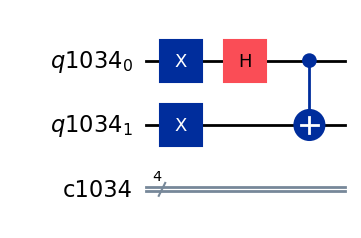

In [37]:
circuit_charlie, q_charlie, c_charlie = build_charlie_circuit()
circuit_charlie.draw(output='mpl')

## Task 2

### XW

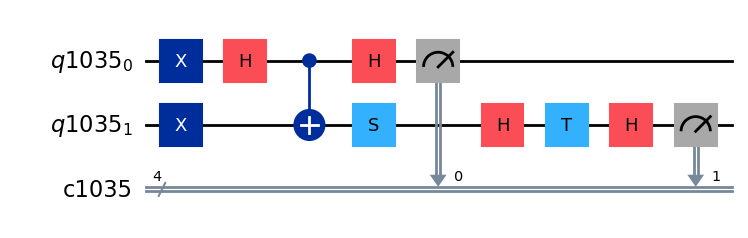

In [38]:
complete_circuit = build_e91_circuit(Alice_direction="x", Bob_direction="w")
complete_circuit.draw(output='mpl')

### XZ

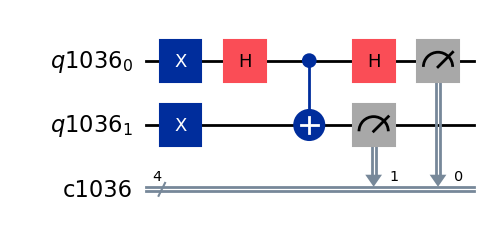

In [39]:
complete_circuit = build_e91_circuit(Alice_direction="x", Bob_direction="z")
complete_circuit.draw(output='mpl')

### XV

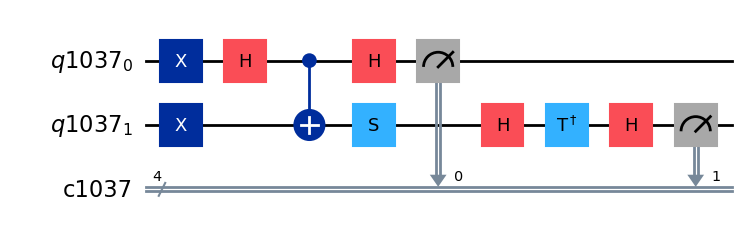

In [40]:
complete_circuit = build_e91_circuit(Alice_direction="x", Bob_direction="v")
complete_circuit.draw(output='mpl')

### WW

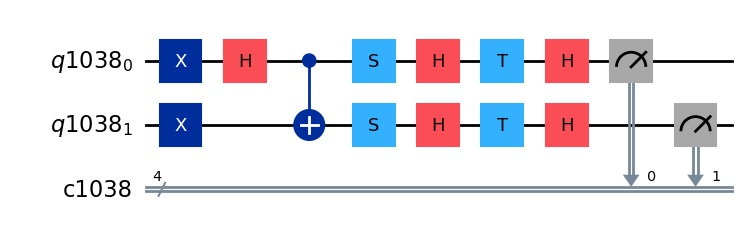

In [41]:
complete_circuit = build_e91_circuit(Alice_direction="w", Bob_direction="w")
complete_circuit.draw(output='mpl')

### WZ

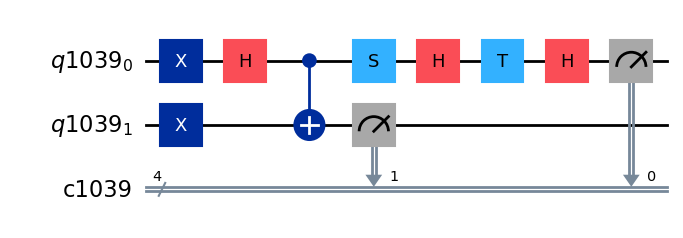

In [42]:
complete_circuit = build_e91_circuit(Alice_direction="w", Bob_direction="z")
complete_circuit.draw(output='mpl')

### WV

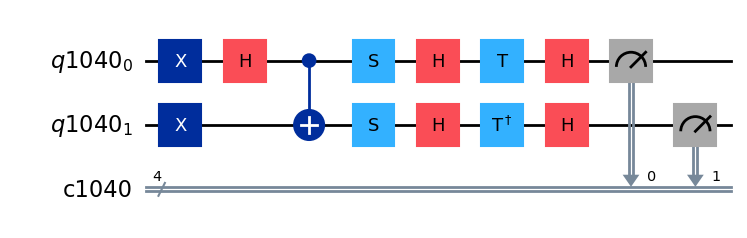

In [43]:
complete_circuit = build_e91_circuit(Alice_direction="w", Bob_direction="v")
complete_circuit.draw(output='mpl')

### ZW

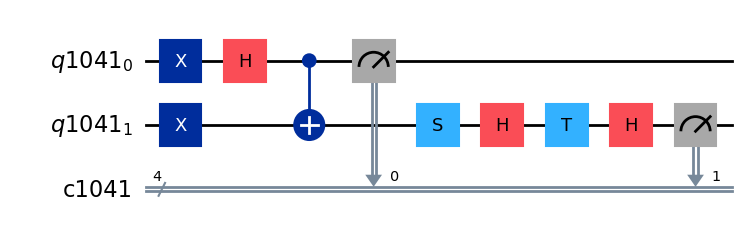

In [44]:
complete_circuit = build_e91_circuit(Alice_direction="z", Bob_direction="w")
complete_circuit.draw(output='mpl')

### ZZ

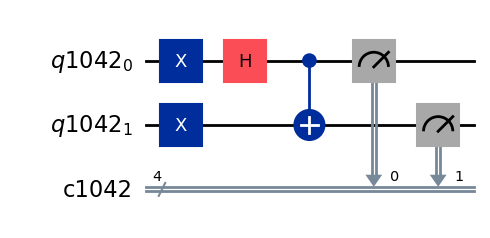

In [45]:
complete_circuit = build_e91_circuit(Alice_direction="z", Bob_direction="z")
complete_circuit.draw(output='mpl')

### ZV

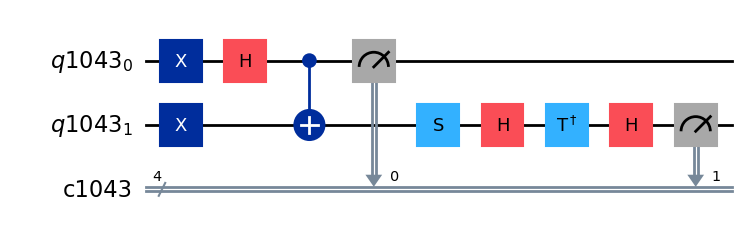

In [46]:
complete_circuit = build_e91_circuit(Alice_direction="z", Bob_direction="v")
complete_circuit.draw(output='mpl')

## Task 3

In [47]:
backend = Aer.get_backend('statevector_simulator')
num_runs = 1024
experiment_results, alice_bs, bob_bs = run_experiment(num_runs=num_runs, 
                                                      backend=backend)
experiment_results[:10]

['0010',
 '0011',
 '0001',
 '0010',
 '0010',
 '0000',
 '0010',
 '0001',
 '0001',
 '0010']

## Task 4

In [48]:
alice_result = [int(val[-2]) for val in experiment_results]
bob_result = [int(val[-1]) for val in experiment_results]
data = {"Alice Results": alice_result,
        "Bob Results": bob_result,
        "Alice Bs": alice_bs,
        "Bob Bs": bob_bs}
results_df = pd.DataFrame(data)
results_df = results_df.replace(0, -1)
results_df["Alice key (k)"] = [np.nan for i in range(len(results_df))]
results_df["Bob key (k')"] = [np.nan for i in range(len(results_df))]
matching = ((results_df["Alice Bs"] == 2) & (results_df["Bob Bs"] == 1)) | ((results_df["Alice Bs"] == 3) & (results_df["Bob Bs"] == 2))
results_df.loc[matching, "Alice key (k)"] = results_df.loc[matching, "Alice Results"]
results_df.loc[matching, "Bob key (k')"] = -1*results_df.loc[matching, "Bob Results"]
final_results_df = results_df.dropna()
final_results_df

,Alice Results,Bob Results,Alice Bs,Bob Bs,Alice key (k),Bob key (k')
2,-1,1,2,1,-1.0,-1.0
7,-1,1,3,2,-1.0,-1.0
15,-1,1,2,1,-1.0,-1.0
17,1,-1,2,1,1.0,1.0
20,1,-1,2,1,1.0,1.0
...,...,...,...,...,...,...
997,-1,1,3,2,-1.0,-1.0
999,1,-1,3,2,1.0,1.0
1003,-1,1,3,2,-1.0,-1.0
1009,-1,1,2,1,-1.0,-1.0


In [49]:
alice_key = final_results_df["Alice key (k)"].values.astype(int)
bob_key = final_results_df["Bob key (k')"].values.astype(int)
print(f"Are the Keys the same: {np.all(alice_key == bob_key)}")

Are the Keys the same: True


In [50]:
print(f"Number of Mismatched Bits: {int(np.sum(alice_key != bob_key))}")

Number of Mismatched Bits: 0


In [51]:
print("Alice Key:")
print(alice_key)
print(f"Key length: {len(alice_key)}")

Alice Key:
[-1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1
 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1
  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1
 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1
 -1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1
 -1 -1 -1]
Key length: 243


In [52]:
print("Bob Key: ")
print(bob_key)
print(f"Key length: {len(bob_key)}")

Bob Key: 
[-1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1
 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1
  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1
 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1
 -1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1
 -1 -1 -1]
Key length: 243


## Task 5 & 6

In [ ]:
XW = results_df[(results_df["Alice Bs"] == 1) & (results_df["Bob Bs"] == 1)]
XV = results_df[(results_df["Alice Bs"] == 1) & (results_df["Bob Bs"] == 3)]
ZW = results_df[(results_df["Alice Bs"] == 3) & (results_df["Bob Bs"] == 1)]
ZV = results_df[(results_df["Alice Bs"] == 3) & (results_df["Bob Bs"] == 3)]

xw_val, xw_hist, sum_xw = calculate_expectation_CHSH(XW)
xv_val, xv_hist, sum_xv  = calculate_expectation_CHSH(XV)
zw_val, zw_hist, sum_zw  = calculate_expectation_CHSH(ZW)
zv_val, zv_hist, sum_zv  = calculate_expectation_CHSH(ZV)

chsh_val = xw_val - xv_val + zw_val + zv_val

print("------------------------")
print(f"Results for XW: {xw_hist}")
print(f"Sum for XW: {sum_xw}")
print(f"Expectation for XW: {xw_val}")
print("------------------------")
print(f"Results for XV: {xv_hist}")
print(f"Sum for XV: {sum_xv}")
print(f"Expectation for XV: {xv_val}")
print("------------------------")
print(f"Results for ZW: {zw_hist}")
print(f"Sum for ZW: {sum_zw}")
print(f"Expectation for ZW: {zw_val}")
print("------------------------")
print(f"Results for ZV: {zv_hist}")
print(f"Sum for ZV: {sum_zv}")
print(f"Expectation for ZV: {zv_val}")
print("------------------------")
print(f"Expected Result: {-2*math.sqrt(2)}")
print(f"The Experimental CSHS value S: {chsh_val}")

------------------------
Results for XW: {(1, -1): 39, (-1, 1): 51, (1, 1): 11, (-1, -1): 6}
Sum for XW: 107
Expectation for XW: -0.6822429906542056
------------------------
Results for XV: {(1, 1): 32, (-1, -1): 54, (-1, 1): 10, (1, -1): 2}
Sum for XV: 98
Expectation for XV: 0.7551020408163264
------------------------
Results for ZW: {(1, -1): 55, (-1, 1): 41, (-1, -1): 11, (1, 1): 8}
Sum for ZW: 115
Expectation for ZW: -0.6695652173913044
------------------------
Results for ZV: {(-1, -1): 13, (-1, 1): 52, (1, -1): 52, (1, 1): 5}
Sum for ZV: 122
Expectation for ZV: -0.7049180327868851
------------------------
Expected Result: -2.8284271247461903
The Experimental CSHS value S: -2.8118282816487215


## Conclusions

The project successfuly demosntrates the implementation of the E91 algorithm, producing matching keys for Alice and Bob, additionally the CHSH inequality result proves the entaglement present in the algorithm. The experiments showcased on mismatches or errors in the resulting keys, likely due to the relatively low noise of the simulator.